<a href="https://colab.research.google.com/github/Rimshay/DEEP-LEARNING/blob/main/VGG_16_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Listing 5.16 Instantiating the VGG16 convolutional base**

In [2]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150,150,3))

58900480/58889256 [==============================] - 0s 0us/step


In [3]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

**Listing 5.17 Extracting features using the pretrained convolutional base**

In [6]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'
!kaggle datasets download -d ashfakyeafi/cat-dog-images-for-classification


 98% 531M/545M [00:05<00:00, 111MB/s]
100% 545M/545M [00:05<00:00, 107MB/s]


In [7]:
!unzip \*.zip && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: cat_dog/dog.5499.jpg    
  inflating: cat_dog/dog.55.jpg      
  inflating: cat_dog/dog.550.jpg     
  inflating: cat_dog/dog.5500.jpg    
  inflating: cat_dog/dog.5501.jpg    
  inflating: cat_dog/dog.5502.jpg    
  inflating: cat_dog/dog.5503.jpg    
  inflating: cat_dog/dog.5504.jpg    
  inflating: cat_dog/dog.5505.jpg    
  inflating: cat_dog/dog.5506.jpg    
  inflating: cat_dog/dog.5507.jpg    
  inflating: cat_dog/dog.5508.jpg    
  inflating: cat_dog/dog.5509.jpg    
  inflating: cat_dog/dog.551.jpg     
  inflating: cat_dog/dog.5510.jpg    
  inflating: cat_dog/dog.5511.jpg    
  inflating: cat_dog/dog.5512.jpg    
  inflating: cat_dog/dog.5513.jpg    
  inflating: cat_dog/dog.5514.jpg    
  inflating: cat_dog/dog.5515.jpg    
  inflating: cat_dog/dog.5516.jpg    
  inflating: cat_dog/dog.5517.jpg    
  inflating: cat_dog/dog.5518.jpg    
  inflating: cat_dog/dog.5519.jpg    
  inflating: cat_dog/dog.552.jpg     

In [8]:
import os, shutil
original_dataset_dir = './cat_dog/'
base_dir = './dog_cat/'
os.mkdir(base_dir)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [10]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
base_dir = './dog_cat/'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
train_features = np.reshape(train_features, (2000, 4*4* 512))
validation_features = np.reshape(validation_features, (1000, 4*4* 512))
test_features = np.reshape(test_features, (1000, 4*4* 512))

**Listing 5.18 Defining and training the densely connected classifier**

In [12]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
    loss='binary_crossentropy',
    metrics=['acc'])
history = model.fit(train_features, train_labels,
epochs=30,
batch_size=20,
validation_data=(validation_features, validation_labels))

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


100/100 [==============================] - 3s 27ms/step - loss: 0.5874 - acc: 0.6845 - val_loss: 0.4349 - val_acc: 0.8370
Epoch 2/30
100/100 [==============================] - 2s 25ms/step - loss: 0.4278 - acc: 0.8010 - val_loss: 0.3724 - val_acc: 0.8470
Epoch 3/30
100/100 [==============================] - 3s 26ms/step - loss: 0.3506 - acc: 0.8495 - val_loss: 0.3189 - val_acc: 0.8800
Epoch 4/30
100/100 [==============================] - 3s 26ms/step - loss: 0.3097 - acc: 0.8785 - val_loss: 0.2953 - val_acc: 0.8860
Epoch 5/30
100/100 [==============================] - 3s 26ms/step - loss: 0.2763 - acc: 0.8885 - val_loss: 0.2805 - val_acc: 0.8890
Epoch 6/30
100/100 [==============================] - 3s 25ms/step - loss: 0.2499 - acc: 0.8970 - val_loss: 0.2706 - val_acc: 0.8950
Epoch 7/30
100/100 [==============================] - 3s 26ms/step - loss: 0.2354 - acc: 0.9060 - val_loss: 0.2631 - val_acc: 0.8960
Epoch 8/30
100/100 [==============================] - 3s 25ms/step - loss: 0.225

**Listing 5.19 Plotting the results**

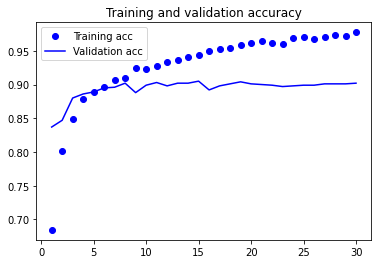

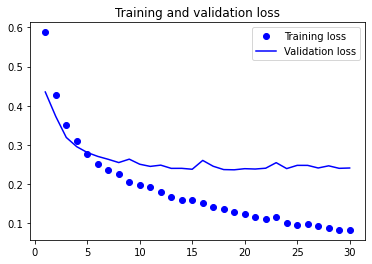

In [13]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

**Listing 5.20 Adding a densely connected classifier on top of the convolutional base**

In [14]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [16]:
conv_base.trainable = False

In [17]:
print('This is the number of trainable weights after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


Listing 5.21 Training the model end to end with a frozen convolutional base

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')
model.compile(loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=2e-5),
    metrics=['acc'])
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/30
100/100 [==============================] - 660s 7s/step - loss: 0.5860 - acc: 0.6940 - val_loss: 0.4631 - val_acc: 0.8090
Epoch 2/30
100/100 [==============================] - 658s 7s/step - loss: 0.4835 - acc: 0.7855 - val_loss: 0.3755 - val_acc: 0.8580
Epoch 3/30
100/100 [==============================] - 659s 7s/step - loss: 0.4347 - acc: 0.8135 - val_loss: 0.3393 - val_acc: 0.8590
Epoch 4/30
100/100 [==============================] - 655s 7s/step - loss: 0.4041 - acc: 0.8200 - val_loss: 0.3146 - val_acc: 0.8680
Epoch 5/30
100/100 [==============================] - 652s 7s/step - loss: 0.3780 - acc: 0.8385 - val_loss: 0.3130 - val_acc: 0.8620
Epoch 6/30
100/100 [==============================] - ETA: 0s - loss: 0.3783 - acc: 0.8345

KeyboardInterrupt: ignored

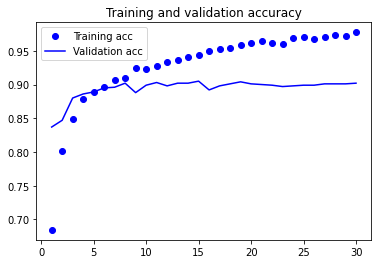

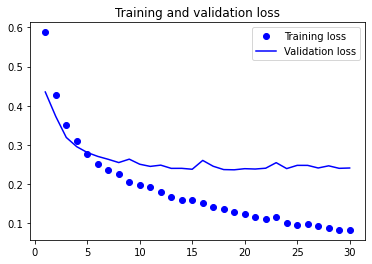

In [19]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

**As a reminder, this is what your convolutional base looks like:**

In [20]:
 conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

Listing 5.22 Freezing all layers up to a specific on

In [21]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

**Listing 5.23 Fine-tuning the model**

In [23]:
model.compile(loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-5),
    metrics=['acc'])
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=50)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/5
100/100 [==============================] - 748s 7s/step - loss: 0.3244 - acc: 0.8525 - val_loss: 0.2294 - val_acc: 0.9040
Epoch 2/5
100/100 [==============================] - 748s 7s/step - loss: 0.2921 - acc: 0.8720 - val_loss: 0.2145 - val_acc: 0.9070
Epoch 3/5
100/100 [==============================] - 808s 8s/step - loss: 0.2556 - acc: 0.8945 - val_loss: 0.1912 - val_acc: 0.9210
Epoch 4/5
100/100 [==============================] - 747s 7s/step - loss: 0.2533 - acc: 0.8885 - val_loss: 0.2058 - val_acc: 0.9150
Epoch 5/5
100/100 [==============================] - 744s 7s/step - loss: 0.2241 - acc: 0.9085 - val_loss: 0.1787 - val_acc: 0.9270


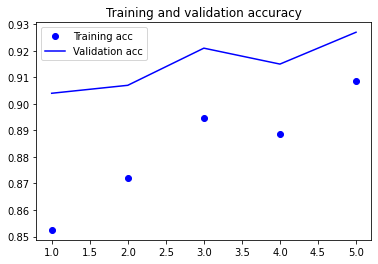

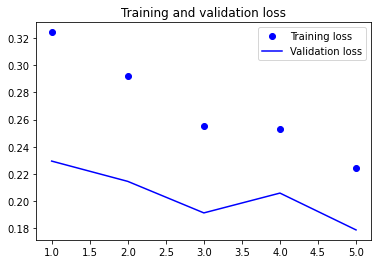

In [24]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

**Listing 5.24 Smoothing the plots**

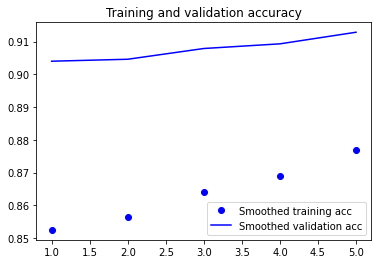

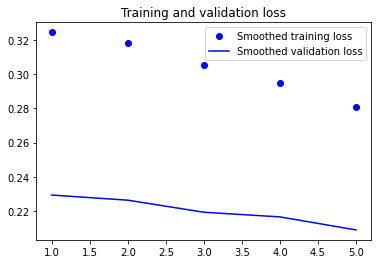

In [25]:
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
plt.plot(epochs,
    smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
    smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,
    smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
    smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

In [26]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


test acc: 0.9190000295639038
